In [1]:
from pypower.api import loadcase, runopf
from pypower.idx_brch import *
from pypower.idx_bus import *
import oct2py
import numpy as np
import os
from tqdm import tqdm
from oct2py import Oct2Py
octave = Oct2Py()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import networkx as nx
import shutil
if shutil.which('latex') is None:
    LATEX_AVAILABLE = False
else:
    LATEX_AVAILABLE = True
if LATEX_AVAILABLE:
    plt.rcParams['font.size'] = 14
    plt.rcParams['text.usetex'] = True
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb}'
    
MAX_BUS = 3000

Loaded pglib_opf_case793_goc.m: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:54<00:00,  1.20it/s]


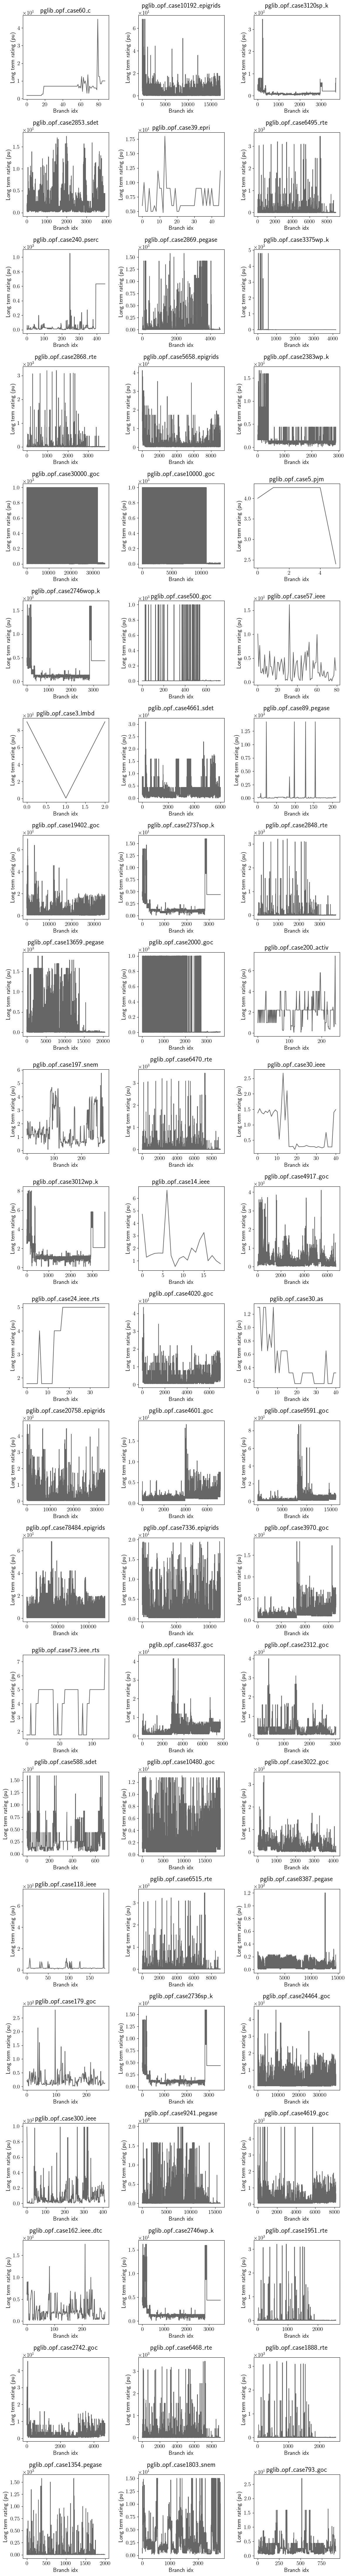

In [2]:
# get all cases in current directory
current_directory = os.getcwd()
all_files_and_directories = os.listdir(current_directory)
case_files = [os.path.abspath(f) for f in all_files_and_directories if f.endswith('.m') and os.path.isfile(os.path.join(current_directory, f))]

if 'cases' not in locals():
    cases, casenames = [], []
    for cf in (t:=tqdm(case_files)):
        octave.source(os.path.basename(cf))
        cases.append(loadcase(octave.feval(os.path.basename(cf).split('.')[0])))
        casenames.append(os.path.basename(cf).split('.')[0])
        t.set_description(f"Loaded {os.path.basename(cf)}")
    
# carry out some tests to charachterize
# rate limits
n = len(cases)
ncols = 3
nrows = n // ncols + (n % ncols > 0)
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))
axs = axs.flatten()
for cname,c,ax in zip(casenames,cases,axs[:len(casenames)]):
    ax.plot(c['branch'][:,RATE_A] / c['baseMVA'],'k',linewidth=1.5,alpha=0.6)
    ax.set_title(cname)
    ax.set_xlabel('Branch idx')
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Long term rating (pu)')
plt.tight_layout()
plt.savefig('brch_lims.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [3]:
# rate limits
n = len(cases)
ncols = 3
nrows = n // ncols + (n % ncols > 0)
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))
axs = axs.flatten()
for cname,c,ax in zip(casenames,cases,axs[:len(casenames)]):
    ax.plot(c['bus'][:,BASE_KV],'k',linewidth=1.5,alpha=0.6)
    ax.set_title(cname)
    ax.set_xlabel('Bus idx')
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Base KV of bus')
plt.tight_layout()
plt.savefig('bus_basekv.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [17]:
# import networkx as nx
# from_nodes = cases[0]['branch'][:,F_BUS]
# to_nodes = cases[0]['branch'][:,T_BUS]
# G = nx.DiGraph()
# for f, t in zip(from_nodes, to_nodes):
#     G.add_edge(f, t)
# layout = nx.spectral_layout(G)
# nx.draw(G, pos=layout, node_color='lightblue', edge_color='gray', node_size=50, font_weight='bold')

# # Show the plot
# plt.show()

# graphs
n = len(cases)
ncols = 3
nrows = n // ncols + (n % ncols > 0)
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))
axs = axs.flatten()
for cname,c,ax in (tq:=tqdm(zip(casenames,cases,axs[:len(casenames)]))):
    from_nodes = c['branch'][:,F_BUS]
    to_nodes = c['branch'][:,T_BUS]
    G = nx.DiGraph()
    for f, t in zip(from_nodes, to_nodes):
        G.add_edge(f, t)
    layout = nx.spectral_layout(G)
    nx.draw(G, ax=ax, pos=layout, node_color='lightblue', edge_color='gray', node_size=50, font_weight='bold')
    ax.set_title(cname)
    tq.set_description(f"Plotted {cname}.")
plt.tight_layout()
plt.savefig('grid_graph.pdf',format='pdf',bbox_inches='tight')
plt.show()

Plotted pglib_opf_case793_goc.: : 66it [22:06, 20.10s/it]        
